In [ ]:
import matplotlib.pyplot as plt
import os
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/Tomatodiseasedataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
BATCH_SIZE=32
# from tensorflow.keras.applications.VGG16 import preprocess_input
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2
                                   )

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = BATCH_SIZE,
                                                    subset='training',
                                                    class_mode = 'categorical',
                                                    target_size = (224,224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  train_datagen.flow_from_directory( train_dir,
                                                          batch_size  = BATCH_SIZE,
                                                          subset='validation',
                                                          class_mode  = 'categorical',
                                                          target_size = (224,224))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  batch_size=1,
                                                  shuffle=False,
                                                  class_mode=None)

Found 1924 images belonging to 6 classes.
Found 479 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


VGG16--

In [ ]:
pre_trained_model = VGG16(input_shape = (224,224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')
for layer in pre_trained_model.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.layers import GlobalAveragePooling2D
# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# x= layers.GlobalAveragePooling2D()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='softmax')(x)

vgg_model = Model( pre_trained_model.input, x)

vgg_model.compile(optimizer = Adam(lr=0.01),
              loss ='binary_crossentropy',
              metrics = ['acc'])

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
BATCH_SIZE=32
n_steps=train_generator.samples//BATCH_SIZE
n_val_steps= validation_generator.samples//BATCH_SIZE
# history = model.fit_generator(
#             train_generator,
#             validation_data = validation_generator,
#             steps_per_epoch = 20,
#             epochs = 100,
#             validation_steps =n_val_steps,
#             verbose = 2)
vgg1_history = vgg_model.fit(train_generator, batch_size=BATCH_SIZE,
                            epochs=25,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/25
60/60 [==============================] - 41s 676ms/step - loss: 0.4249 - acc: 0.3584 - val_loss: 0.4061 - val_acc: 0.3460
Epoch 2/25
60/60 [==============================] - 41s 691ms/step - loss: 0.3483 - acc: 0.5507 - val_loss: 0.3761 - val_acc: 0.4353
Epoch 3/25
60/60 [==============================] - 39s 643ms/step - loss: 0.3071 - acc: 0.6505 - val_loss: 0.3400 - val_acc: 0.6317
Epoch 4/25
60/60 [==============================] - 37s 610ms/step - loss: 0.2880 - acc: 0.6945 - val_loss: 0.3361 - val_acc: 0.5826
Epoch 5/25
60/60 [==============================] - 38s 638ms/step - loss: 0.2559 - acc: 0.7537 - val_loss: 0.2906 - val_acc: 0.6964
Epoch 6/25
60/60 [==============================] - 40s 669ms/step - loss: 0.2430 - acc: 0.7643 - val_loss: 0.3072 - val_acc: 0.6339
Epoch 7/25
60/60 [==============================] - 40s 666ms/step - loss: 0.2296 - acc: 0.7838 - val_loss: 0.2736 - val_acc: 0.6741
Epoch 8/25
60/60 [==============================] - 37s 612ms/step - 

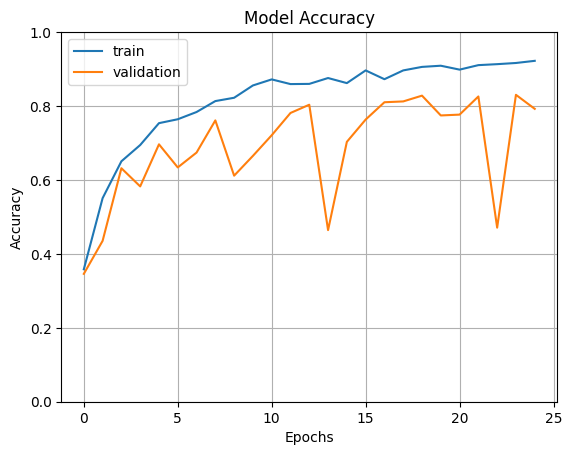

<Figure size 640x480 with 0 Axes>

In [ ]:
fig1 = plt.gcf()
plt.plot(vgg1_history.history['acc'])
plt.plot(vgg1_history.history['val_acc'])
plt.axis(ymin=0.0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig("vgg_accuracy.png")

In [ ]:
import numpy as np
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = vgg_model.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print(" VGG16 Accuracy : {:.2f}%".format(
    acc * 100))

480/480 [==============================] - 5s 10ms/step
 VGG16 Accuracy : 85.21%


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(true_classes,pred_classes))
print(confusion_matrix(true_classes,pred_classes))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       184
           1       0.89      0.99      0.94        97
           2       0.50      0.70      0.59       110
           3       1.00      0.42      0.59       168
           4       0.94      0.86      0.90       108
           5       0.74      0.97      0.84       109

    accuracy                           0.81       776
   macro avg       0.83      0.82      0.80       776
weighted avg       0.85      0.81      0.80       776

[[184   0   0   0   0   0]
 [  1  96   0   0   0   0]
 [ 17  12  77   0   0   4]
 [  0   0  59  70   6  33]
 [  0   0  15   0  93   0]
 [  1   0   2   0   0 106]]


In [ ]:
vgg_model.save("/content/drive/MyDrive/ensembling-070723/vgg_weights.h5")

DENSENET

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
pre_trained_model = DenseNet121(input_shape = (224,224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.layers import GlobalAveragePooling2D
# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# x= layers.GlobalAveragePooling2D()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='softmax')(x)

densenet_model = Model( pre_trained_model.input, x)

densenet_model.compile(optimizer = Adam(lr=0.001),
              loss ='binary_crossentropy',
              metrics = ['acc'])

In [ ]:
densenet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
BATCH_SIZE=32
n_steps=train_generator.samples//BATCH_SIZE
n_val_steps= validation_generator.samples//BATCH_SIZE
# history = model.fit_generator(
#             train_generator,
#             validation_data = validation_generator,
#             steps_per_epoch = 20,
#             epochs = 100,
#             validation_steps =n_val_steps,
#             verbose = 2)
densenet_history = densenet_model.fit(train_generator, batch_size=BATCH_SIZE,
                            epochs=25,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/25
60/60 [==============================] - 52s 719ms/step - loss: 0.2826 - acc: 0.7569 - val_loss: 0.1338 - val_acc: 0.8951
Epoch 2/25
60/60 [==============================] - 40s 669ms/step - loss: 0.0836 - acc: 0.9440 - val_loss: 0.0754 - val_acc: 0.9420
Epoch 3/25
60/60 [==============================] - 37s 611ms/step - loss: 0.0589 - acc: 0.9672 - val_loss: 0.0586 - val_acc: 0.9665
Epoch 4/25
60/60 [==============================] - 40s 663ms/step - loss: 0.0452 - acc: 0.9762 - val_loss: 0.0497 - val_acc: 0.9732
Epoch 5/25
60/60 [==============================] - 39s 656ms/step - loss: 0.0358 - acc: 0.9820 - val_loss: 0.0540 - val_acc: 0.9576
Epoch 6/25
60/60 [==============================] - 40s 661ms/step - loss: 0.0260 - acc: 0.9910 - val_loss: 0.0441 - val_acc: 0.9732
Epoch 7/25
60/60 [==============================] - 40s 663ms/step - loss: 0.0248 - acc: 0.9889 - val_loss: 0.0436 - val_acc: 0.9621
Epoch 8/25
60/60 [==============================] - 40s 660ms/step - 

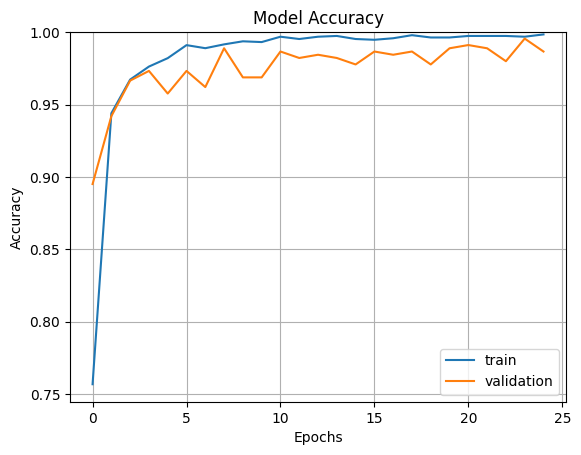

In [ ]:
fig1 = plt.gcf()
plt.plot(densenet_history.history['acc'])
plt.plot(densenet_history.history['val_acc'])
plt.axis(ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import numpy as np
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = densenet_model.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print(" Densenet Accuracy : {:.2f}%".format(
    acc * 100))

480/480 [==============================] - 11s 16ms/step
 Densenet Accuracy : 96.67%


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(true_classes,pred_classes))
print(confusion_matrix(true_classes,pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       0.95      1.00      0.98        80
           2       0.99      0.82      0.90        80
           3       0.99      0.99      0.99        80
           4       0.95      1.00      0.98        80
           5       0.93      1.00      0.96        80

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480

[[79  0  1  0  0  0]
 [ 0 80  0  0  0  0]
 [ 0  4 66  1  3  6]
 [ 0  0  0 79  1  0]
 [ 0  0  0  0 80  0]
 [ 0  0  0  0  0 80]]


In [ ]:
densenet_model.save("/content/drive/MyDrive/ensembling-070723/Densenet_weights.h5")

[[183   0   1   0   0   0]
 [  0  97   0   0   0   0]
 [  2   5  96   2   4   1]
 [  0   0  11 156   1   0]
 [  0   0   0   0 108   0]
 [  0   0   0   0   0 109]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       184
           1       0.95      1.00      0.97        97
           2       0.89      0.87      0.88       110
           3       0.99      0.93      0.96       168
           4       0.96      1.00      0.98       108
           5       0.99      1.00      1.00       109

    accuracy                           0.97       776
   macro avg       0.96      0.97      0.96       776
weighted avg       0.97      0.97      0.96       776



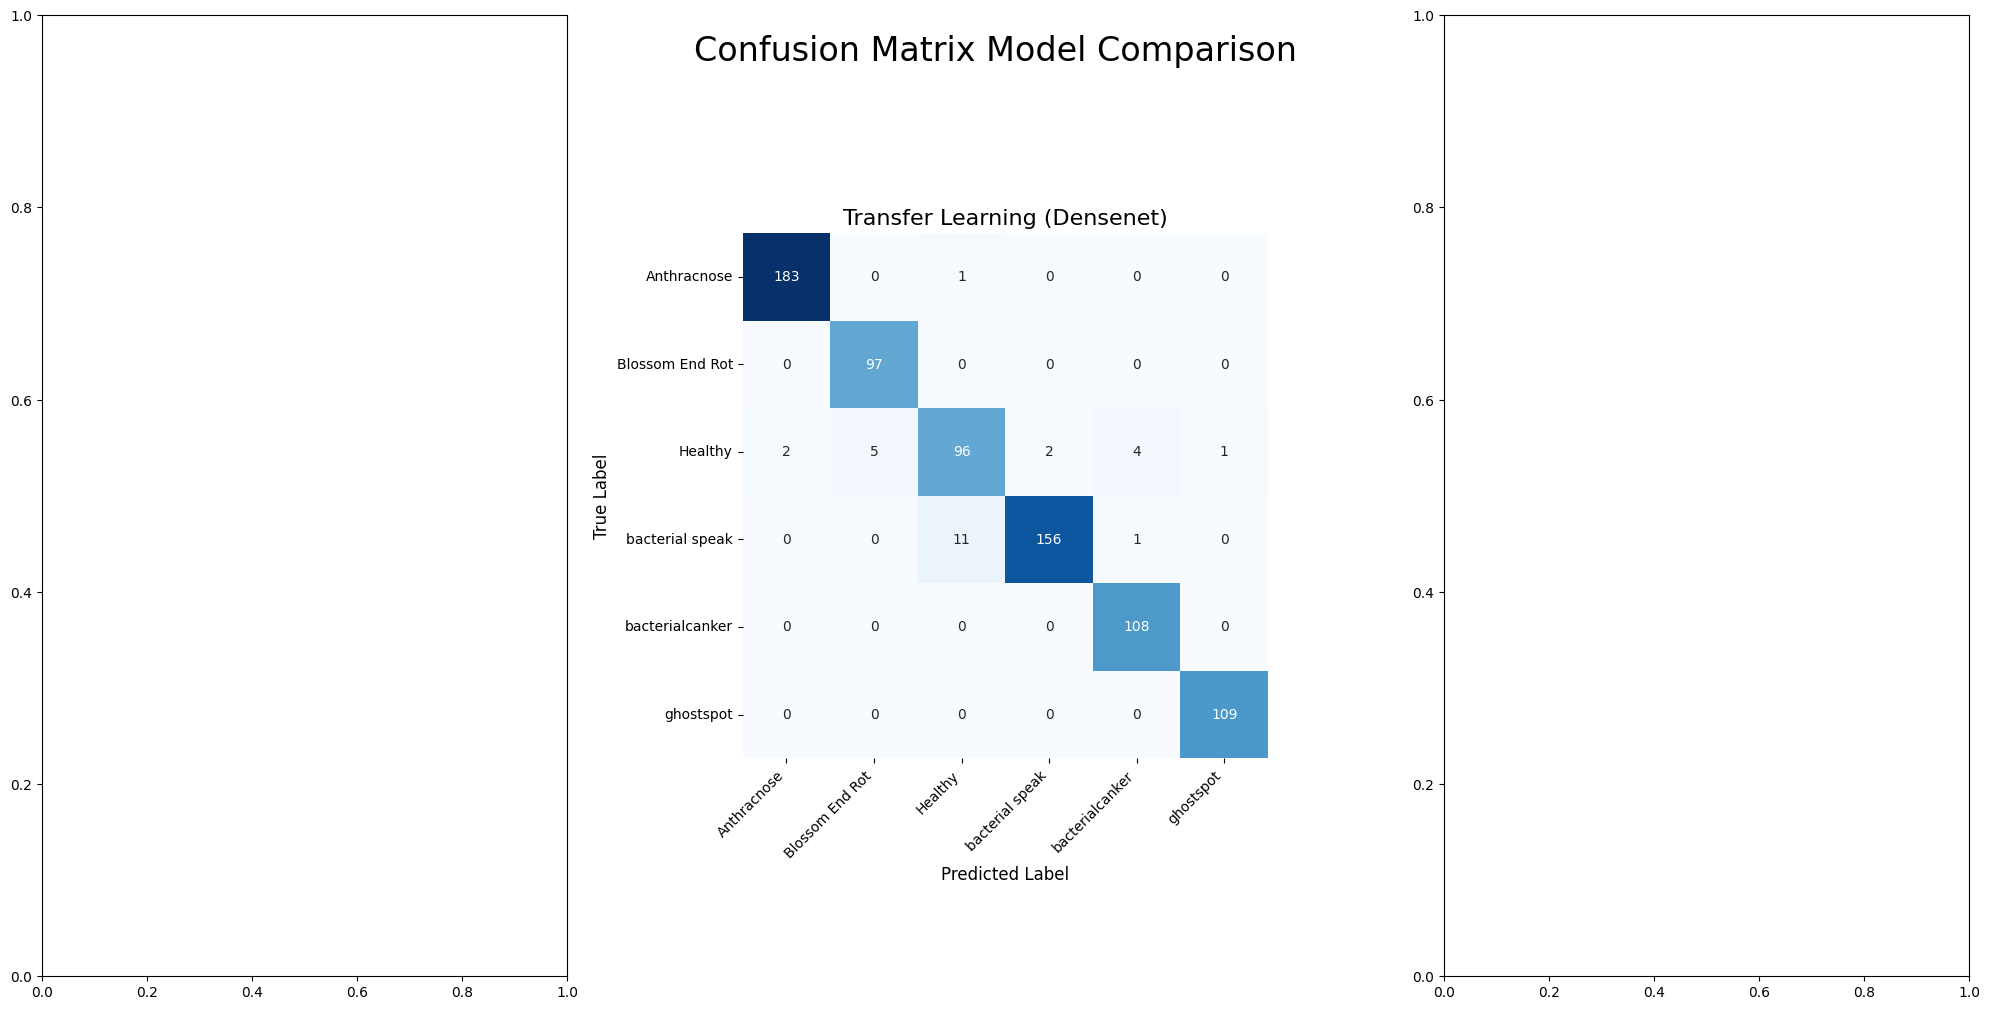

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

# Get the names of the ten classes
class_names = test_generator.class_indices.keys()
print(confusion_matrix(true_classes,pred_classes))
print(classification_report(true_classes,pred_classes))

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# plot_heatmap(true_classes, scratch_pred_classes, class_names, ax1, title="Custom CNN")
plot_heatmap(true_classes,pred_classes, class_names, ax2, title="Transfer Learning (Densenet)")
# plot_heatmap(true_classes,pred_classes_ft, class_names, ax3, title="Transfer Learning (VGG16) with Fine-Tuning")

fig.suptitle("Confusion Matrix Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.)
plt.show()

RESNET

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
pre_trained_model = VGG19(input_shape = (224,224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')
for layer in pre_trained_model.layers:
        layer.trainable=False
x = layers.Flatten()(pre_trained_model.output)
# x= layers.GlobalAveragePooling2D()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='softmax')(x)

resnet_model = Model( pre_trained_model.input, x)

resnet_model.compile(optimizer = SGD(lr=0.01),
              loss ='categorical_crossentropy',
              metrics = ['acc'])


80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
BATCH_SIZE=32
n_steps=train_generator.samples//BATCH_SIZE
n_val_steps= validation_generator.samples//BATCH_SIZE
# history = model.fit_generator(
#             train_generator,
#             validation_data = validation_generator,
#             steps_per_epoch = 20,
#             epochs = 100,
#             validation_steps =n_val_steps,
#             verbose = 2)
resnet_history = resnet_model.fit(train_generator, batch_size=BATCH_SIZE,
                            epochs=25,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/25
60/60 [==============================] - 47s 697ms/step - loss: 1.8642 - acc: 0.2585 - val_loss: 1.7408 - val_acc: 0.2143
Epoch 2/25
60/60 [==============================] - 40s 668ms/step - loss: 1.6230 - acc: 0.3362 - val_loss: 1.7881 - val_acc: 0.2455
Epoch 3/25
60/60 [==============================] - 38s 631ms/step - loss: 1.4299 - acc: 0.4429 - val_loss: 1.3755 - val_acc: 0.5268
Epoch 4/25
60/60 [==============================] - 41s 677ms/step - loss: 1.3587 - acc: 0.4641 - val_loss: 1.3038 - val_acc: 0.5246
Epoch 5/25
60/60 [==============================] - 44s 732ms/step - loss: 1.2870 - acc: 0.5365 - val_loss: 1.3707 - val_acc: 0.5424
Epoch 6/25
60/60 [==============================] - 38s 628ms/step - loss: 1.1687 - acc: 0.5994 - val_loss: 1.6664 - val_acc: 0.3281
Epoch 7/25
60/60 [==============================] - 38s 629ms/step - loss: 1.0452 - acc: 0.6337 - val_loss: 1.6012 - val_acc: 0.3884
Epoch 8/25
60/60 [==============================] - 39s 641ms/step - 

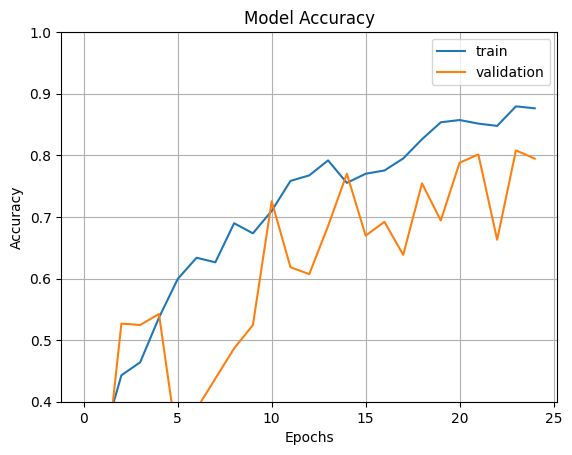

In [ ]:
fig1 = plt.gcf()
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.axis(ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import numpy as np
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = resnet_model.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print(" REsnet Accuracy : {:.2f}%".format(
    acc * 100))

480/480 [==============================] - 162s 337ms/step
 REsnet Accuracy : 84.38%


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(true_classes,pred_classes))
print(confusion_matrix(true_classes,pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       184
           1       0.86      0.98      0.92        97
           2       0.79      0.60      0.68       110
           3       0.85      0.45      0.59       168
           4       0.94      0.82      0.88       108
           5       0.50      1.00      0.66       109

    accuracy                           0.79       776
   macro avg       0.82      0.80      0.78       776
weighted avg       0.84      0.79      0.79       776

[[177   0   0   5   0   2]
 [  2  95   0   0   0   0]
 [  0  15  66   1   5  23]
 [  0   0  15  76   1  76]
 [  0   0   3   7  89   9]
 [  0   0   0   0   0 109]]


In [ ]:
resnet_model.save("/content/drive/MyDrive/ensembling-070723/resnet_weighhts.h5")

InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (224,224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')
for layer in pre_trained_model.layers:
        layer.trainable=False


# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# x= layers.GlobalAveragePooling2D()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='softmax')(x)

inception_model = Model( pre_trained_model.input, x)

inception_model.compile(optimizer = SGD(lr=0.0001),
              loss ='categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
inception_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
BATCH_SIZE=32
n_steps=train_generator.samples//BATCH_SIZE
n_val_steps= validation_generator.samples//BATCH_SIZE
# history = model.fit_generator(
#             train_generator,
#             validation_data = validation_generator,
#             steps_per_epoch = 20,
#             epochs = 100,
#             validation_steps =n_val_steps,
#             verbose = 2)
inception_history = inception_model.fit(train_generator, batch_size=BATCH_SIZE,
                            epochs=25,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/25
60/60 [==============================] - 46s 700ms/step - loss: 2.0166 - acc: 0.5513 - val_loss: 0.7060 - val_acc: 0.7433
Epoch 2/25
60/60 [==============================] - 40s 672ms/step - loss: 0.4542 - acc: 0.8457 - val_loss: 0.6716 - val_acc: 0.7589
Epoch 3/25
60/60 [==============================] - 36s 615ms/step - loss: 0.2475 - acc: 0.9170 - val_loss: 0.3537 - val_acc: 0.8862
Epoch 4/25
60/60 [==============================] - 40s 666ms/step - loss: 0.1591 - acc: 0.9524 - val_loss: 0.2061 - val_acc: 0.9330
Epoch 5/25
60/60 [==============================] - 42s 698ms/step - loss: 0.1212 - acc: 0.9630 - val_loss: 0.2143 - val_acc: 0.9196
Epoch 6/25
60/60 [==============================] - 39s 642ms/step - loss: 0.1302 - acc: 0.9582 - val_loss: 0.1422 - val_acc: 0.9576
Epoch 7/25
60/60 [==============================] - 38s 640ms/step - loss: 0.1003 - acc: 0.9646 - val_loss: 0.1265 - val_acc: 0.9621
Epoch 8/25
60/60 [==============================] - 40s 670ms/step - 

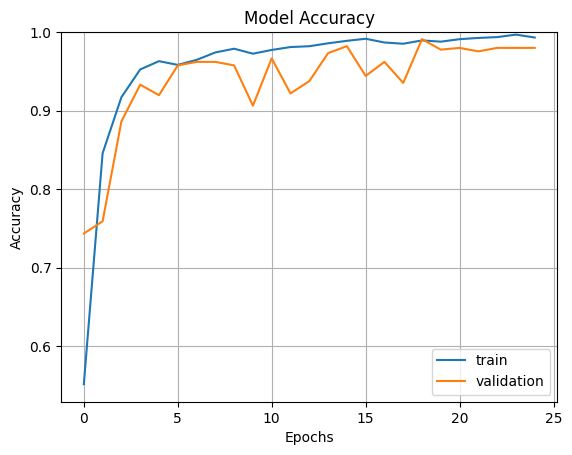

In [ ]:
fig1 = plt.gcf()
plt.plot(inception_history.history['acc'])
plt.plot(inception_history.history['val_acc'])
plt.axis(ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import numpy as np
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = inception_model.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print("Inception Accuracy : {:.2f}%".format(
    acc * 100))

480/480 [==============================] - 7s 13ms/step
Inception Accuracy : 98.33%


In [ ]:
inception_model.save("/content/drive/MyDrive/ensembling-070723/inception_weights.h5")

XCEPTION

In [ ]:
pre_trained_model= Xception(include_top=False,input_shape=(224,224,3),
                   pooling='avg',classes=10,
                   weights='imagenet')
for layer in pre_trained_model.layers:
        layer.trainable=False

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# x= layers.GlobalAveragePooling2D()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='softmax')(x)

xception_model = Model( pre_trained_model.input, x)

xception_model.compile(optimizer = SGD(lr=0.001),
              loss ='binary_crossentropy',
              metrics = ['acc'])

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
xception_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:

BATCH_SIZE=32
n_steps=train_generator.samples//BATCH_SIZE
n_val_steps= validation_generator.samples//BATCH_SIZE
# history = model.fit_generator(
#             train_generator,
#             validation_data = validation_generator,
#             steps_per_epoch = 20,
#             epochs = 100,
#             validation_steps =n_val_steps,
#             verbose = 2)
xception_history = xception_model.fit(train_generator, batch_size=BATCH_SIZE,
                            epochs=25,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/25
60/60 [==============================] - 48s 720ms/step - loss: 0.4792 - acc: 0.2844 - val_loss: 0.4236 - val_acc: 0.4420
Epoch 2/25
60/60 [==============================] - 39s 647ms/step - loss: 0.4088 - acc: 0.4868 - val_loss: 0.3940 - val_acc: 0.6004
Epoch 3/25
60/60 [==============================] - 40s 668ms/step - loss: 0.3759 - acc: 0.6332 - val_loss: 0.3681 - val_acc: 0.6763
Epoch 4/25
60/60 [==============================] - 38s 630ms/step - loss: 0.3491 - acc: 0.6971 - val_loss: 0.3522 - val_acc: 0.6987
Epoch 5/25
60/60 [==============================] - 38s 629ms/step - loss: 0.3270 - acc: 0.7368 - val_loss: 0.3290 - val_acc: 0.7433
Epoch 6/25
60/60 [==============================] - 40s 677ms/step - loss: 0.3033 - acc: 0.7844 - val_loss: 0.3176 - val_acc: 0.7701
Epoch 7/25
60/60 [==============================] - 41s 675ms/step - loss: 0.2867 - acc: 0.8029 - val_loss: 0.2972 - val_acc: 0.8170
Epoch 8/25
60/60 [==============================] - 40s 673ms/step - 

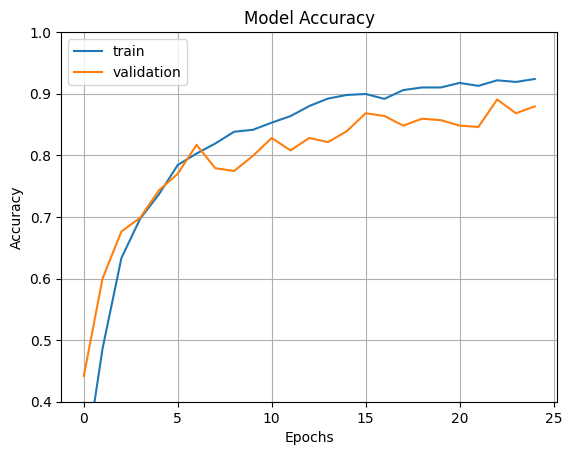

In [ ]:
fig1 = plt.gcf()
plt.plot(xception_history.history['acc'])
plt.plot(xception_history.history['val_acc'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import numpy as np
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = xception_model.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print(" Xception Accuracy : {:.2f}%".format(
    acc * 100))

480/480 [==============================] - 7s 12ms/step
 Xception Accuracy : 90.62%


In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = xception_model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_classes, y_pred_keras)

480/480 [==============================] - 5s 10ms/step


ValueError: ignored

In [ ]:
xception_model.save("/content/drive/MyDrive/ensembling-070723/xception_weights.h5")

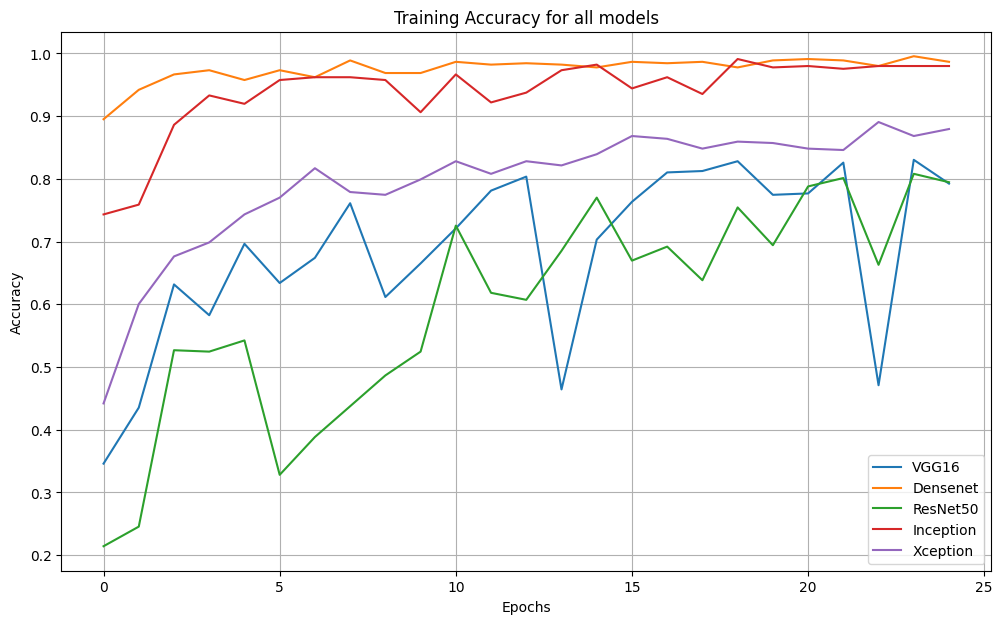

In [ ]:
plt.figure(figsize = (12,7))
plt.title('Training Accuracy for all models')
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(vgg1_history.history['val_acc'],label = 'VGG16')
plt.plot(densenet_history.history['val_acc'], label = 'Densenet')
plt.plot(resnet_history.history['val_acc'],label = 'ResNet50')
plt.plot(inception_history.history['val_acc'], label = 'Inception')
plt.plot(xception_history.history['val_acc'], label = 'Xception')
plt.legend()
plt.show()

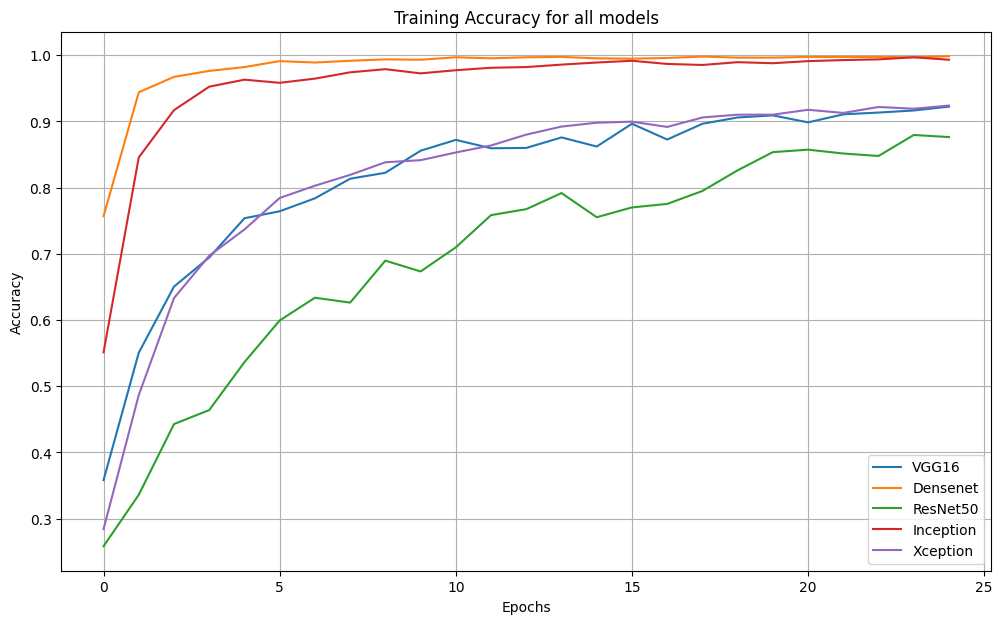

In [ ]:
plt.figure(figsize = (12,7))
plt.title('Training Accuracy for all models')
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(vgg1_history.history['acc'],label = 'VGG16')
plt.plot(densenet_history.history['acc'], label = 'Densenet')
plt.plot(resnet_history.history['acc'],label = 'ResNet50')
plt.plot(inception_history.history['acc'], label = 'Inception')
plt.plot(xception_history.history['acc'], label = 'Xception')
plt.legend()
plt.show()

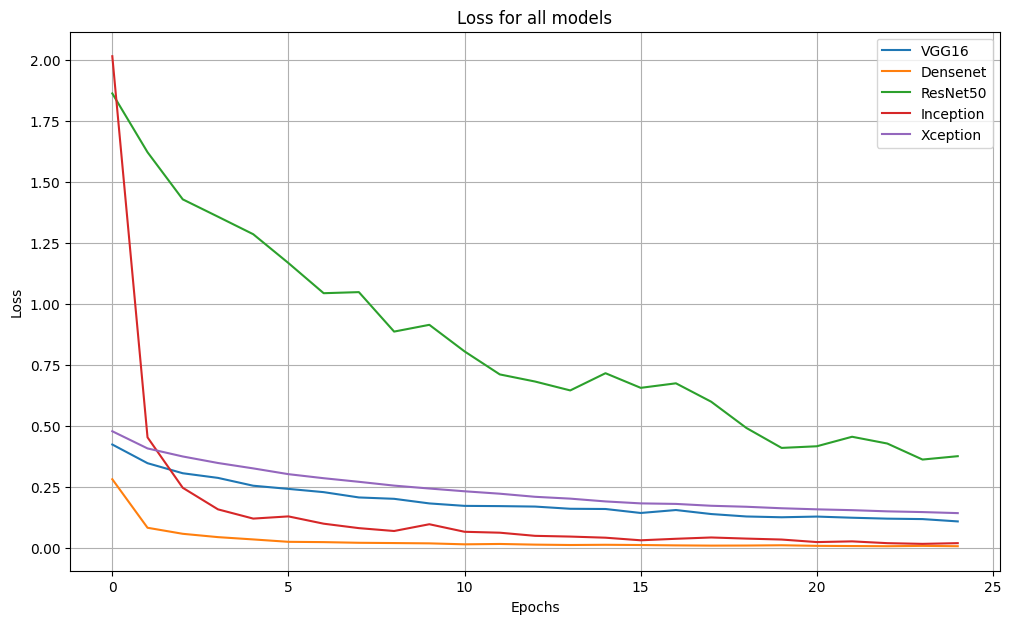

In [ ]:
plt.figure(figsize = (12,7))
plt.title('Loss for all models')
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(vgg1_history.history['loss'],label = 'VGG16')
plt.plot(densenet_history.history['loss'], label = 'Densenet')
plt.plot(resnet_history.history['loss'],label = 'ResNet50')
plt.plot(inception_history.history['loss'], label = 'Inception')
plt.plot(xception_history.history['loss'], label = 'Xception')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(test_dir+'/elephant/022.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices

o = ['B deficiency','Ca deficiency','Fe deficiency','K deficiency','Mg deficiency','Mn deficiency','N deficiency','P deficiency','S deficiency','Zn deficiency']
o[list(result[0]).index(np.max(result))]

np.max(result)

list(result[0]).index(np.max(result))

AttributeError: ignored

In [ ]:
import tensorflow.keras
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
keras_model = tensorflow.keras.models.load_model('/content/drive/MyDrive/ensembling-070723/Densenet_weights.h5', compile=False)
keras_model._name = 'model1'
keras_model2 = tensorflow.keras.models.load_model('/content/drive/MyDrive/ensembling-070723/xception_weights.h5', compile=False)
keras_model2._name = 'model2'
keras_model3 = tensorflow.keras.models.load_model('/content/drive/MyDrive/ensembling-070723/inception_weights.h5', compile=False)
keras_model3._name = 'model3'
models = [keras_model, keras_model2,keras_model3]
model_input = tf.keras.Input(shape=(125, 125, 3))
model_input = tf.keras.Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)


In [ ]:
ensemble_model.compile(optimizer=SGD(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

ensemble_history = ensemble_model.fit(train_generator, validation_data=validation_generator, epochs=25)

Epoch 1/25
61/61 [==============================] - 582s 9s/step - loss: 0.1152 - accuracy: 0.9984 - val_loss: 0.1675 - val_accuracy: 0.9937
Epoch 2/25
61/61 [==============================] - 40s 658ms/step - loss: 0.1179 - accuracy: 0.9969 - val_loss: 0.1588 - val_accuracy: 0.9916
Epoch 3/25
61/61 [==============================] - 42s 684ms/step - loss: 0.1068 - accuracy: 0.9990 - val_loss: 0.1620 - val_accuracy: 0.9833
Epoch 4/25
61/61 [==============================] - 40s 660ms/step - loss: 0.1057 - accuracy: 1.0000 - val_loss: 0.1527 - val_accuracy: 0.9916
Epoch 5/25
61/61 [==============================] - 40s 659ms/step - loss: 0.1003 - accuracy: 0.9990 - val_loss: 0.1505 - val_accuracy: 0.9937
Epoch 6/25
61/61 [==============================] - 40s 663ms/step - loss: 0.0941 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9854
Epoch 7/25
61/61 [==============================] - 40s 663ms/step - loss: 0.0930 - accuracy: 0.9979 - val_loss: 0.1551 - val_accuracy: 0.9833
E

In [ ]:

ensemble_model.save('/content/drive/MyDrive/ensembling-070723/ensemble1.h5')

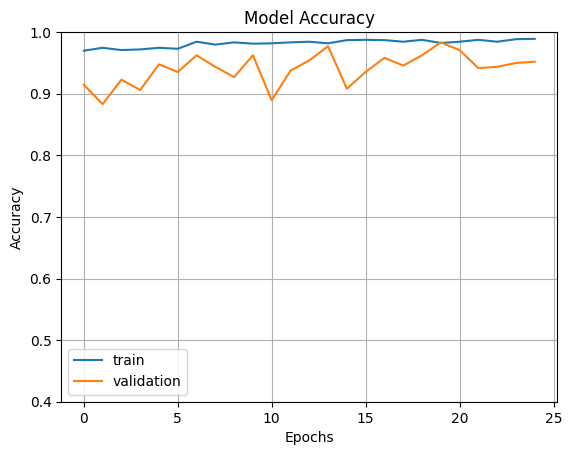

In [ ]:
fig1 = plt.gcf()
plt.plot(ensemble_history.history['accuracy'])
plt.plot(ensemble_history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = ensemble_model.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print(" Ensemble(Vgg,Resnet,Inception) Model Accuracy : {:.2f}%".format(
    acc * 100))

776/776 [==============================] - 23s 30ms/step
 Ensemble(Vgg,Resnet,Inception) Model Accuracy : 91.24%


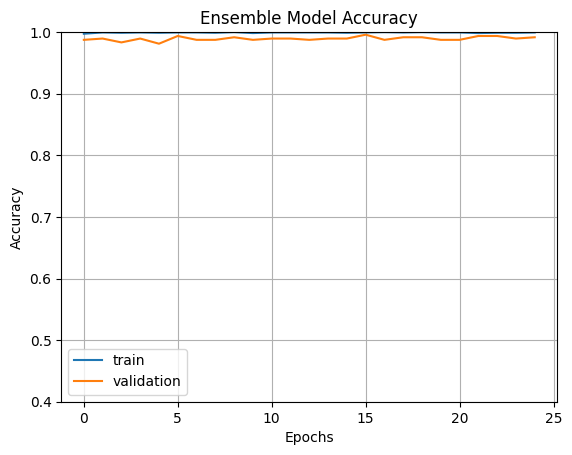

In [ ]:
fig1 = plt.gcf()
plt.plot(ensemble_history.history['accuracy'])
plt.plot(ensemble_history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Ensemble Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/ensembling-070723/ensembledensxcepincep.h5')


In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = ensemble_model.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print(" Ensemble(Vgg,Resnet,Inception) Model Accuracy : {:.2f}%".format(
    acc * 100))

776/776 [==============================] - 23s 30ms/step
 Ensemble(Vgg,Resnet,Inception) Model Accuracy : 91.24%


<ipython-input-5-812c19fd86b5>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  input_img = imageio.imread('/content/Bacterial-speck-tomato.jpg')



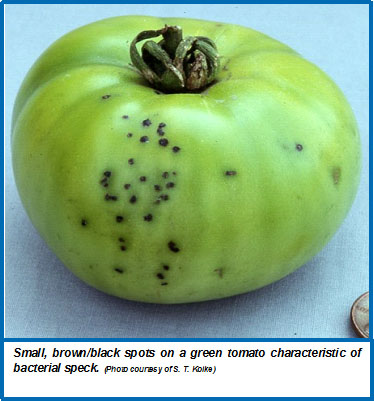
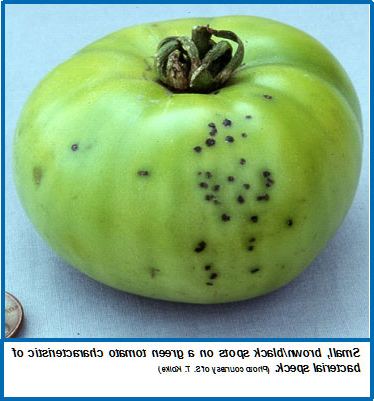
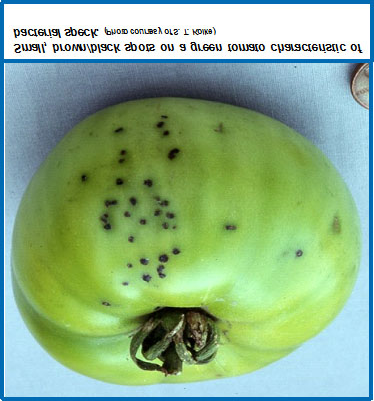


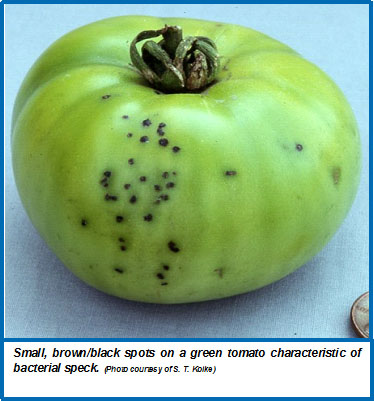
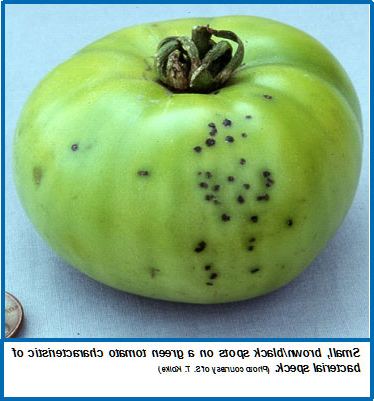
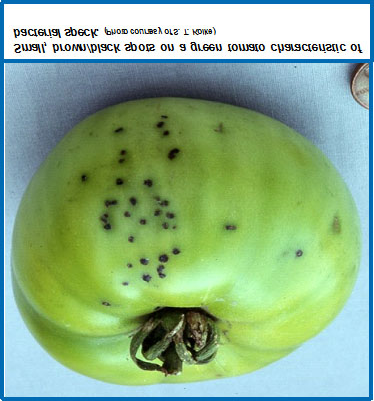

In [ ]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import ipyplot
input_img = imageio.imread('/content/Bacterial-speck-tomato.jpg')
#Horizontal Flip
hflip= iaa.Fliplr(p=1.0)
input_hf= hflip.augment_image(input_img)
#Vertical Flip
vflip= iaa.Flipud(p=1.0)
input_vf= vflip.augment_image(input_img)
images_list=[input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [ ]:
!pip install ipyplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00



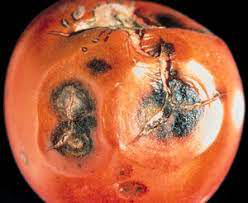
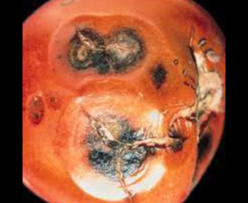


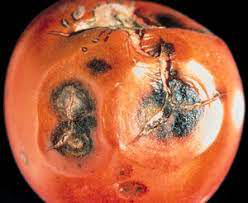
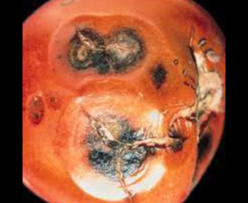

In [ ]:
rot1 = iaa.Affine(rotate=(90))
input_rot1 = rot1.augment_image(input_img)
images_list=[input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [ ]:
from tensorflow.keras.models import load_model
vggmodel= load_model("/content/drive/MyDrive/ensembling-070723/ensembledensxcepincep.h5")

In [ ]:
import numpy as np
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = vggmodel.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print(" ResNet50 Accuracy : {:.2f}%".format(
    acc * 100))

480/480 [==============================] - 25s 35ms/step
 ResNet50 Accuracy : 98.54%


                 precision    recall  f1-score   support

    Antharcnose       1.00      1.00      1.00        80
Blossom End Rot       0.99      1.00      0.99        80
        Healthy       1.00      0.93      0.96        80
 bacterialSpeak       1.00      0.99      0.99        80
bacterialcanker       0.94      1.00      0.97        80
      ghostspot       0.99      1.00      0.99        80

       accuracy                           0.99       480
      macro avg       0.99      0.99      0.99       480
   weighted avg       0.99      0.99      0.99       480

[[80  0  0  0  0  0]
 [ 0 80  0  0  0  0]
 [ 0  1 74  0  4  1]
 [ 0  0  0 79  1  0]
 [ 0  0  0  0 80  0]
 [ 0  0  0  0  0 80]]


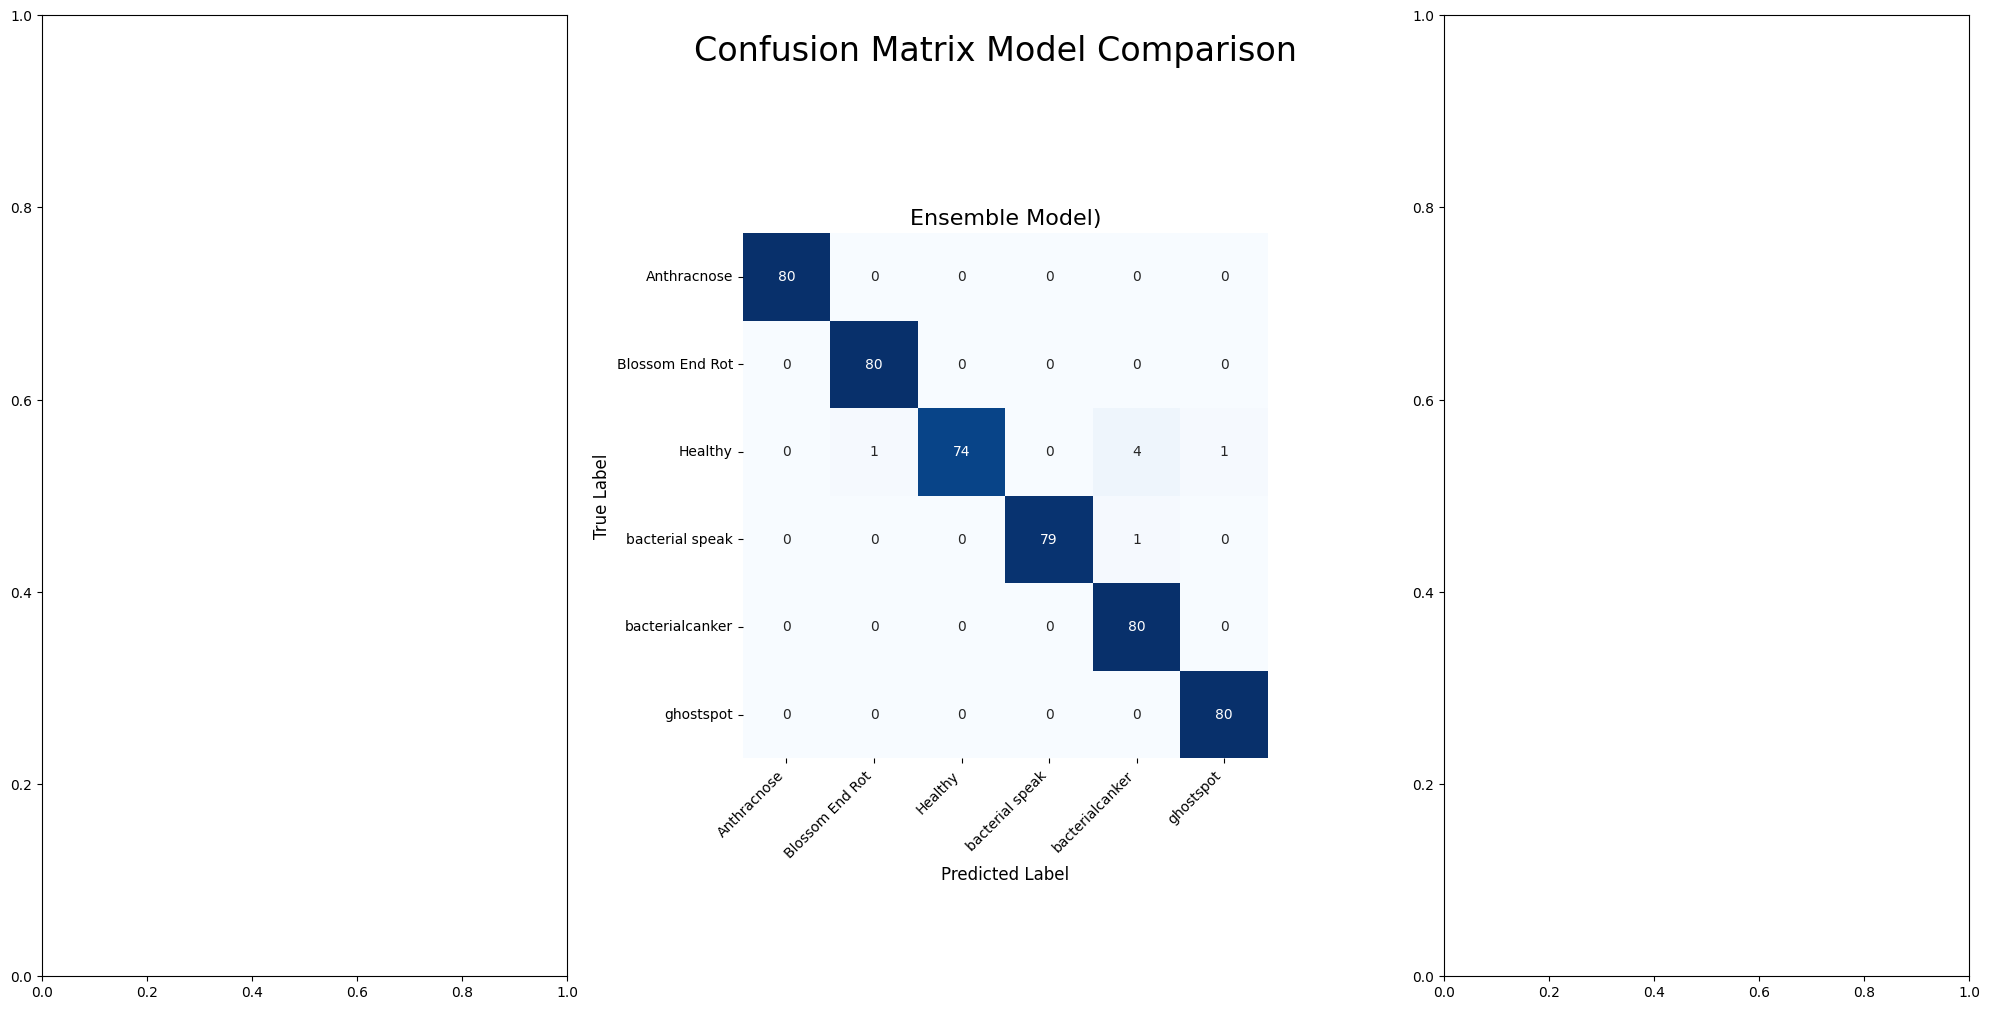

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
target_names=['Antharcnose','Blossom End Rot','Healthy','bacterialSpeak','bacterialcanker','ghostspot']
print(classification_report(true_classes,pred_classes,target_names=target_names))
print(confusion_matrix(true_classes,pred_classes))
class_names = test_generator.class_indices.keys()
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# plot_heatmap(true_classes, scratch_pred_classes, class_names, ax1, title="Custom CNN")
plot_heatmap(true_classes,pred_classes, class_names, ax2, title="Ensemble Model)")
# plot_heatmap(true_classes,pred_classes_ft, class_names, ax3, title="Transfer Learning (Inceptionv3) with Fine-Tuning")

fig.suptitle("Confusion Matrix Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
target_names=['Antharcnose','Blossom End Rot','Healthy','bacterialSpeak','bacterialcanker','ghostspot']
print(classification_report(true_classes,pred_classes,target_names=target_names))
print(confusion_matrix(true_classes,pred_classes))

                 precision    recall  f1-score   support

    Antharcnose       0.84      1.00      0.91        80
Blossom End Rot       0.92      0.99      0.95        80
        Healthy       0.66      0.74      0.69        80
 bacterialSpeak       1.00      0.57      0.73        80
bacterialcanker       0.94      0.84      0.89        80
      ghostspot       0.84      0.96      0.90        80

       accuracy                           0.85       480
      macro avg       0.87      0.85      0.85       480
   weighted avg       0.87      0.85      0.85       480

[[80  0  0  0  0  0]
 [ 1 79  0  0  0  0]
 [13  7 59  0  0  1]
 [ 0  0 16 46  4 14]
 [ 0  0 13  0 67  0]
 [ 1  0  2  0  0 77]]


In [ ]:
from tensorflow.keras.models import load_model
ensemodel= load_model("/content/drive/MyDrive/ensembling-070723/ensembledensxcepincep.h5")

In [ ]:
import numpy as np
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
preds = ensemodel.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)
from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, pred_classes)
print(" Ensemble Accuracy : {:.2f}%".format(
    acc * 100))

480/480 [==============================] - 26s 34ms/step
 Ensemble Accuracy : 98.54%


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
target_names=['Antharcnose','Blossom End Rot','Healthy','bacterialSpeak','bacterialcanker','ghostspot']
print(classification_report(true_classes,pred_classes,target_names=target_names))
print(confusion_matrix(true_classes,pred_classes))

                 precision    recall  f1-score   support

    Antharcnose       1.00      1.00      1.00        80
Blossom End Rot       0.99      1.00      0.99        80
        Healthy       1.00      0.93      0.96        80
 bacterialSpeak       1.00      0.99      0.99        80
bacterialcanker       0.94      1.00      0.97        80
      ghostspot       0.99      1.00      0.99        80

       accuracy                           0.99       480
      macro avg       0.99      0.99      0.99       480
   weighted avg       0.99      0.99      0.99       480

[[80  0  0  0  0  0]
 [ 0 80  0  0  0  0]
 [ 0  1 74  0  4  1]
 [ 0  0  0 79  1  0]
 [ 0  0  0  0 80  0]
 [ 0  0  0  0  0 80]]
